# Фитовање помоћу теорије спрегнутих модова

$$ S_{21} = \left( A_0 + \frac{\Gamma^R_1 e^{j\varphi_1}}{j(f - f^r_1) + \Gamma^I_1 + \Gamma^R_1} + \cdots + \frac{\Gamma^R_N e^{j\varphi_N}}{j(f - f^r_N) + \Gamma^I_N + \Gamma^R_N}) \right) e^{j(\varphi_0 - k_f f)}$$

$A_0$ је нерезонантни део, затим иду модови од $1$ до $N$. $f$ -- фреквенција. Сви параметри су реални.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy.optimize as opt
from lmfit import minimize, Parameters

In [10]:
data = np.loadtxt("s4_2porta_s21.txt", comments="%")
freq = data[0:41,0]/1e12
s21 = data[0:41,1] + 1j*data[41:,1]

In [11]:
def background(freq, a0, fi0, k_f):
    faza = fi0 - freq*k_f
    return a0*np.exp(1j*faza)
    
def f1mod(freq, f0, gamma_i, gamma_r, fi):
    br = np.ones_like(freq)*np.exp(1j*fi)*gamma_r
    im = np.ones_like(freq)*(1j*(freq - f0) + gamma_i + gamma_r)
    return br/im

params = Parameters()

params.add('a0', value=0.85)
params.add('fi0', value=1)
params.add('k_f', value=20)

params.add('fr1', value=0.45)
params.add('g_i1', value=0.01)
params.add('g_r1', value=0.01)
params.add('fi1', value=1.1)

params.add('fr2', value=0.5)
params.add('g_i2', value=0.001, min=0)
params.add('g_r2', value=0.001, min=0)
params.add('fi2', value=0.0)

def s21_model(params, freq):
    faza = params['fi0'] - freq*params['k_f']
    return np.exp(1j*faza)*(params['a0']
     + f1mod(freq, params['fr1'], params['g_i1'], params['g_r1'], params['fi1'])
     + f1mod(freq, params['fr2'], params['g_i2'], params['g_r2'], params['fi2']))

def residual(params, freq, s21_data):
    dif = s21_data - s21_model(params, freq)
    return dif.view(float)

out = minimize(residual, params, args=(freq, s21))
out

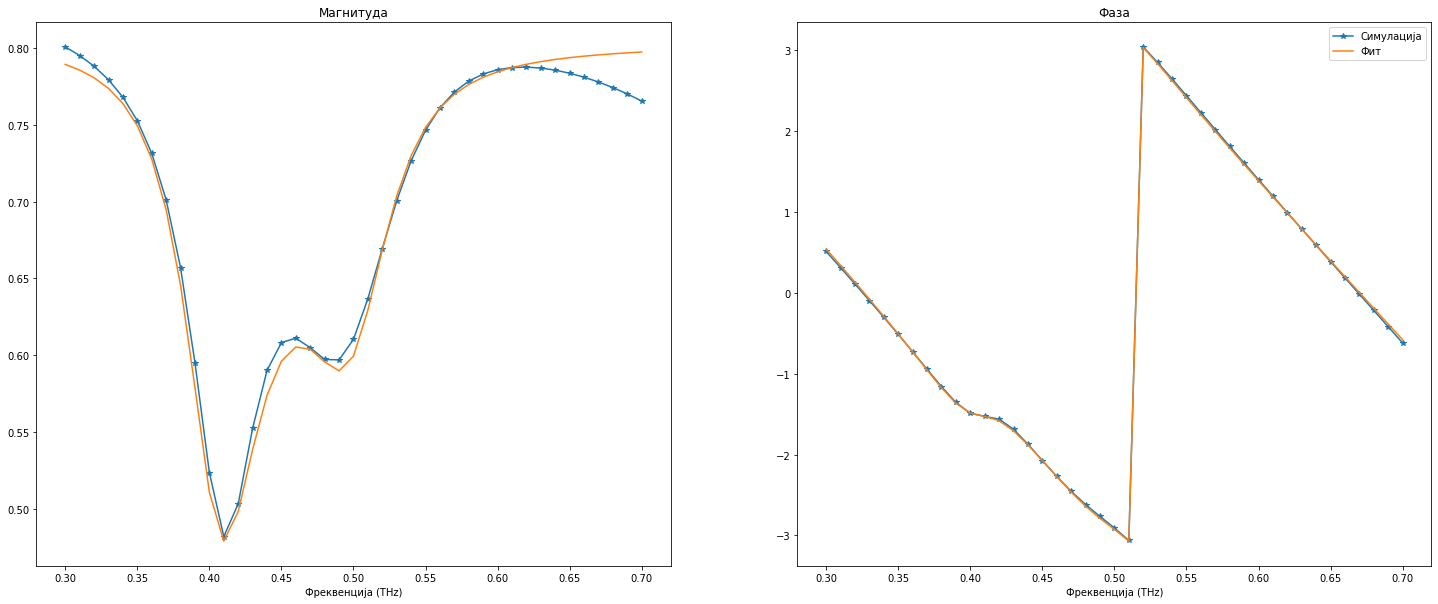

In [12]:
plt.figure(figsize=(25,10))
plt.subplot(121)
plt.title("Магнитуда")
plt.xlabel("Фреквенција (THz)")
plt.plot(freq, abs(s21), '*-', label="Симулација")
# plt.plot(freq, abs(background(freq, 0.85, 1, 20)))
# plt.plot(freq, abs(s21_model(params, freq)))
plt.plot(freq, abs(s21_model(out.params, freq)), label="Фит")
# plt.legend()
plt.subplot(122)
plt.title("Фаза")
plt.xlabel("Фреквенција (THz)")
plt.plot(freq, np.angle(s21), '*-', label="Симулација")
# plt.plot(freq, np.angle(background(freq, 0.85, 1, 20)))
# plt.plot(freq, np.angle(s21_model(params, freq)))
plt.plot(freq, np.angle(s21_model(out.params, freq)), label="Фит")
plt.legend()
plt.show()